In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Covid19-Death-Predictions/sample_submission.csv
/kaggle/input/Covid19-Death-Predictions/train.csv
/kaggle/input/Covid19-Death-Predictions/test.csv


In [2]:
pip install pycountry-convert  # run only one time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.3/224.3 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## importing libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_theme('poster')

In [4]:
import pycountry_convert as pc

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor


## Loading and working on train dataset

In [5]:
cov_death_train=pd.read_csv('/kaggle/input/Covid19-Death-Predictions/train.csv')

# Loading test dataset for overview of data in the test dataset and whatever the preprocessing, feature engineering and usage of functions same applies to test data also

In [6]:
cov_death_test=pd.read_csv('/kaggle/input/Covid19-Death-Predictions/test.csv')

In [7]:
cov_death_train.shape

(129156, 20)

In [8]:
cov_death_test.shape

(43052, 19)

# Observing values in train dataset

In [9]:
cov_death_train.sample(10)

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
103247,896690561,Senegal,45.00,2022,2.67,24.00,1.42,NaN,NaN,NaN,NaN,6049.00,NaN,NaN,NaN,NaN,358.00,206.00,0.00,1.00
22777,287885087,Cameroon,0.00,2022,0.00,0.00,0.00,NaN,NaN,NaN,NaN,151.00,NaN,NaN,NaN,NaN,6.00,109.00,0.00,0.00
62661,516459366,Japan,74460.00,2021,597.53,66.00,0.53,103693475.00,59956695.00,43736780.00,NaN,1525681.00,83.21,48.11,35.10,NaN,12243.00,605988.00,0.49,96.00
5498,952294961,Argentina,34697.00,2020,766.33,1094.00,24.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1066.00
111795,298701126,Sudan,465.00,2021,10.19,0.00,0.00,NaN,NaN,NaN,NaN,33000.00,NaN,NaN,NaN,NaN,723.00,33229.00,0.07,15.00
86,576657277,World,654771.00,2020,82.78,34369.00,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31991.00
31897,750577636,Curacao,489.00,2021,2569.11,2.00,10.51,NaN,NaN,NaN,NaN,335.00,NaN,NaN,NaN,NaN,1760.00,161.00,0.09,4.00
35391,871162251,Dominica,215.00,2022,2969.12,0.00,0.00,61649.00,32113.00,29536.00,NaN,32.00,85.14,44.35,40.79,NaN,442.00,12.00,0.02,4.00
27927,699328189,Comoros,15.00,2020,18.26,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
82231,836008944,Morocco,5223.00,2022,140.87,128.00,3.45,NaN,NaN,NaN,5239799.00,65141.00,NaN,NaN,NaN,14.13,1757.00,3834.00,0.01,97.00


## Basic Operations

In [10]:
cov_death_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129156 entries, 0 to 129155
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   129156 non-null  int64  
 1   Location                             129156 non-null  object 
 2   Weekly Cases                         128943 non-null  float64
 3   Year                                 129156 non-null  int64  
 4   Weekly Cases per Million             128288 non-null  float64
 5   Weekly Deaths                        127898 non-null  float64
 6   Weekly Deaths per Million            127247 non-null  float64
 7   Total Vaccinations                   40270 non-null   float64
 8   People Vaccinated                    38429 non-null   float64
 9   People Fully Vaccinated              36574 non-null   float64
 10  Total Boosters                       19847 non-null   float64
 11  Daily Vaccina

In [11]:
cov_death_train.isna().sum()

Id                                          0
Location                                    0
Weekly Cases                              213
Year                                        0
Weekly Cases per Million                  868
Weekly Deaths                            1258
Weekly Deaths per Million                1909
Total Vaccinations                      88886
People Vaccinated                       90727
People Fully Vaccinated                 92582
Total Boosters                         109309
Daily Vaccinations                      51316
Total Vaccinations per Hundred          88886
People Vaccinated per Hundred           90727
People Fully Vaccinated per Hundred     92582
Total Boosters per Hundred             109309
Daily Vaccinations per Hundred          51316
Daily People Vaccinated                 51765
Daily People Vaccinated per Hundred     51765
Next Week's Deaths                          0
dtype: int64

In [12]:
cov_death_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,129156.00,550259683.46,259988989.24,100000571.00,325342148.25,549728473.50,775659763.75,999999302.00
Weekly Cases,128943.00,95201.31,632971.56,0.00,104.00,1084.00,9750.00,24066176.00
Year,129156.00,2020.91,0.74,2020.00,2020.00,2021.00,2021.00,2022.00
Weekly Cases per Million,128288.00,1379.07,4013.42,0.00,18.29,188.58,1046.37,104220.24
Weekly Deaths,127898.00,1072.82,5287.85,0.00,1.00,13.00,127.00,103568.00
Weekly Deaths per Million,127247.00,10.85,24.74,0.00,0.05,1.71,10.93,1040.71
Total Vaccinations,40270.00,245009331.00,1032824293.36,0.00,990003.75,7772026.50,49763075.75,12121400382.00
People Vaccinated,38429.00,117409560.18,493206984.45,0.00,577139.00,4306986.00,25574418.00,5255161167.00
People Fully Vaccinated,36574.00,98622641.67,430384367.80,1.00,468333.75,3811594.00,21688253.00,4816606324.00
Total Boosters,19847.00,43654579.84,186299710.80,1.00,38941.50,1397130.00,11148402.50,2129043705.00


## Spliting the dataset into train and valid data 

In [13]:
X=cov_death_train.copy()
y=X.pop('Next Week\'s Deaths')

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.22, random_state=42)

In [15]:
X_train.shape

(100741, 19)

In [16]:
y_train.shape

(100741,)

In [17]:
X_valid.shape

(28415, 19)

In [18]:
y_valid.shape

(28415,)

# Preprocessing on Categorical features

In [19]:
X_train['Location'].nunique()

224

In [20]:
X_valid['Location'].nunique()

223

In [21]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [22]:
notinlist=['World','Africa','Asia','Bonaire Sint Eustatius and Saba','Cote d\'Ivoire','Curacao','Democratic Republic of Congo','Europe','European Union'
          ,'Faeroe Islands','High income','International','Kosovo','Low income','Lower middle income','North America','Oceania','South America','Timor'
           ,'Upper middle income']

In [23]:
X_train['Continent']=X_train['Location'].apply(lambda x:country_to_continent(x) if(x not in notinlist) else x)

In [24]:
X_valid['Continent']=X_valid['Location'].apply(lambda x:country_to_continent(x) if(x not in notinlist) else x)

In [25]:
X_train['Continent'].value_counts()

Africa                             25202
Asia                               22691
Europe                             22238
North America                      13827
South America                       6451
Oceania                             3879
High income                          531
Lower middle income                  528
Upper middle income                  523
World                                512
European Union                       508
Low income                           504
International                        497
Democratic Republic of Congo         496
Cote d'Ivoire                        481
Curacao                              476
Kosovo                               458
Bonaire Sint Eustatius and Saba      373
Faeroe Islands                       305
Timor                                261
Name: Continent, dtype: int64

In [26]:
X_valid['Continent'].value_counts()

Africa                             6948
Europe                             6418
Asia                               6380
North America                      3933
South America                      1751
Oceania                            1092
European Union                      164
International                       158
Kosovo                              155
Upper middle income                 155
Low income                          150
Curacao                             140
High income                         138
World                               137
Lower middle income                 136
Cote d'Ivoire                       133
Bonaire Sint Eustatius and Saba     126
Democratic Republic of Congo        125
Faeroe Islands                       93
Timor                                83
Name: Continent, dtype: int64

In [27]:
error_list=['European Union','Democratic Republic of Congo','Curacao','Cote d\'Ivoire','Kosovo','Bonaire Sint Eustatius and Saba','Faeroe Islands','Timor'
           ,'Upper middle income','High income','International','Low income','Lower middle income']
    
new_list=['Europe','Africa','South America','Africa','Europe','South America','Europe','Asia','World','World','World','World','World']

In [28]:
X_train['Continent'].replace(error_list,new_list,inplace=True)

In [29]:
X_valid['Continent'].replace(error_list,new_list,inplace=True)

In [30]:
X_train['Continent'].value_counts()

Africa           26179
Europe           23509
Asia             22952
North America    13827
South America     7300
Oceania           3879
World             3095
Name: Continent, dtype: int64

In [31]:
X_valid['Continent'].value_counts()

Africa           7206
Europe           6830
Asia             6463
North America    3933
South America    2017
Oceania          1092
World             874
Name: Continent, dtype: int64

In [32]:
X_train.drop('Location',axis=1,inplace=True)

In [33]:
X_valid.drop('Location',axis=1,inplace=True)

In [34]:
X_train['Year']=X_train['Year'].map({2020:0,2021:1,2022:2})

In [35]:
X_valid['Year']=X_valid['Year'].map({2020:0,2021:1,2022:2})

# Feature Engineering 

In [36]:
Weekly_feature=['Weekly Cases','Weekly Deaths','Weekly Cases per Million','Weekly Deaths per Million']

In [37]:
def fill_miss_weekly(weekly_var_list,df):
    for var_name in weekly_var_list:
        df[var_name].fillna(df[var_name].median(),inplace=True)
    return df
        
    

In [38]:
X_train=fill_miss_weekly(Weekly_feature,X_train)

In [39]:
X_valid=fill_miss_weekly(Weekly_feature,X_valid)

In [40]:
X_train[['Weekly Cases','Weekly Deaths','Weekly Cases per Million','Weekly Deaths per Million']].isna().sum()

Weekly Cases                 0
Weekly Deaths                0
Weekly Cases per Million     0
Weekly Deaths per Million    0
dtype: int64

In [41]:
X_valid[['Weekly Cases','Weekly Deaths','Weekly Cases per Million','Weekly Deaths per Million']].isna().sum()

Weekly Cases                 0
Weekly Deaths                0
Weekly Cases per Million     0
Weekly Deaths per Million    0
dtype: int64

In [42]:
missing_col=['Total Vaccinations','People Vaccinated','People Fully Vaccinated','Total Boosters','Daily Vaccinations']

In [43]:
def fill_miss_min(weekly_var_list,df):
    for var_name in weekly_var_list:
        df[var_name].fillna(df[var_name].min(),inplace=True)
    return df

In [44]:
X_train=fill_miss_min(missing_col,X_train)

In [45]:
X_valid=fill_miss_min(missing_col,X_valid)

In [46]:
missing_per_hundred=['Total Vaccinations per Hundred','People Vaccinated per Hundred',
                     'People Fully Vaccinated per Hundred','Total Boosters per Hundred',
                     'Daily Vaccinations per Hundred','Daily People Vaccinated',
                     'Daily People Vaccinated per Hundred']

In [47]:
def what_to_put(df,list_per_perform):
    min_value={}
    median_value={}
    for col_name in list_per_perform:
        min_value[col_name]=df[col_name].min()
        median_value[col_name]=df[col_name].median()
    df=pd.DataFrame([min_value.values(),median_value.values()],index=['min','median'],columns=min_value.keys()).T
    return df
        
        

In [48]:
X_train_missing_per_hundred=what_to_put(X_train,missing_per_hundred)
X_train_missing_per_hundred

,min,median
Total Vaccinations per Hundred,0.00,79.03
People Vaccinated per Hundred,0.00,46.33
People Fully Vaccinated per Hundred,0.00,38.51
Total Boosters per Hundred,0.00,9.81
Daily Vaccinations per Hundred,0.00,1496.00
Daily People Vaccinated,0.00,3281.00
Daily People Vaccinated per Hundred,0.00,0.05


In [49]:
X_valid_missing_per_hundred=what_to_put(X_valid,missing_per_hundred)
X_valid_missing_per_hundred

,min,median
Total Vaccinations per Hundred,0.00,79.54
People Vaccinated per Hundred,0.00,46.31
People Fully Vaccinated per Hundred,0.00,38.52
Total Boosters per Hundred,0.00,9.55
Daily Vaccinations per Hundred,0.00,1512.00
Daily People Vaccinated,0.00,3304.00
Daily People Vaccinated per Hundred,0.00,0.05


# handling missing values of per hundred's features

In [50]:
def fill_miss_per_hundred(per_hundred_list,df):
    for var_name in per_hundred_list:
        df[var_name].fillna(df[var_name].median(),inplace=True)
    return df

In [51]:
X_train=fill_miss_per_hundred(missing_per_hundred,X_train)

In [52]:
X_valid=fill_miss_per_hundred(missing_per_hundred,X_valid)

## Dropping Id feature from train and valid dataset

In [53]:
X_train.drop('Id',axis=1,inplace=True)
X_valid.drop('Id',axis=1,inplace=True)

## handling Continent category feature

In [54]:
def handle_cat_feature(df):
    cont_df=pd.get_dummies(df['Continent'],prefix='Continent')
    df=pd.merge(df,cont_df,left_index=True,right_index=True)
    df.drop('Continent',axis=1,inplace=True)
    return df

In [55]:
X_train=handle_cat_feature(X_train)
X_train.sample(5)

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_World
69122,29.00,1,5.58,0.00,0.00,0.00,0.00,1.00,1.00,0.00,79.03,46.33,38.51,9.81,1496.00,3281.00,0.05,1,0,0,0,0,0,0
21364,63.00,1,5.02,0.00,0.00,0.00,0.00,1.00,1.00,0.00,79.03,46.33,38.51,9.81,1496.00,3281.00,0.05,1,0,0,0,0,0,0
19173,0.00,2,0.00,10.00,321.32,0.00,0.00,1.00,1.00,13.00,79.03,46.33,38.51,9.81,418.00,8.00,0.03,0,0,0,1,0,0,0
111508,33.00,0,0.72,0.00,0.00,0.00,0.00,1.00,1.00,0.00,79.03,46.33,38.51,9.81,1496.00,3281.00,0.05,1,0,0,0,0,0,0
58949,6384.00,1,146.65,159.00,3.65,0.00,0.00,1.00,1.00,97766.00,79.03,46.33,38.51,9.81,2246.00,55830.00,0.13,0,1,0,0,0,0,0


In [56]:
X_train.shape

(100741, 24)

In [57]:
X_valid=handle_cat_feature(X_valid) 
X_valid.sample(5)

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_World
113479,11245.00,1,1293.81,229.00,26.35,356593.00,326521.00,26405.00,76.00,16954.00,4.10,3.76,0.30,0.00,1951.00,14169.00,0.16,0,0,1,0,0,0,0
106963,95.00,0,5.57,5.00,0.29,0.00,0.00,1.00,1.00,0.00,79.54,46.31,38.52,9.55,1512.00,3304.00,0.05,1,0,0,0,0,0,0
66967,3757.00,2,505.99,20.00,2.69,0.00,0.00,1.00,1.00,48048.00,79.54,46.31,38.52,9.55,6471.00,6368.00,0.09,0,1,0,0,0,0,0
120561,2029.00,0,44.25,24.00,0.52,0.00,0.00,1.00,1.00,0.00,79.54,46.31,38.52,9.55,1512.00,3304.00,0.05,1,0,0,0,0,0,0
115914,0.00,1,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,79.54,46.31,38.52,9.55,1512.00,3304.00,0.05,1,0,0,0,0,0,0


In [58]:
X_valid.shape

(28415, 24)

In [59]:
handle_train=pd.concat([X_train,y_train],axis=1)
handle_train.drop_duplicates(keep='first',inplace=True)
handle_train.shape

(91574, 25)

In [60]:
handle_valid=pd.concat([X_valid,y_valid],axis=1)
handle_valid.drop_duplicates(keep='first',inplace=True)
handle_valid.shape

(26815, 25)

In [61]:
handle_train.drop('Continent_World',axis=1,inplace=True)

In [62]:
handle_valid.drop('Continent_World',axis=1,inplace=True)

In [63]:
X_train=handle_train.copy()
y_train=X_train.pop('Next Week\'s Deaths')

In [64]:
X_valid=handle_valid.copy()
y_valid=X_valid.pop('Next Week\'s Deaths')

## Model Building

In [65]:
# param_grid = {
#     "n_estimators":[26,100,200],
#     "max_depth":[10, 50],
#     "max_features":[6,10,16]
# }

In [66]:
# ran_model=RandomForestRegressor()

In [67]:
# ran_model_tuned=GridSearchCV(estimator=ran_model,param_grid=param_grid,cv=3,n_jobs=-1)

In [68]:
# ran_model_tuned.fit(X_train,y_train)

In [69]:
# ran_model_tuned.best_estimator_

In [70]:
ran_model=RandomForestRegressor(max_depth=50, max_features=6, n_estimators=200)

In [71]:
ran_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, max_features=6, n_estimators=200)

In [72]:
predict_valid=ran_model.predict(X_valid)

In [73]:
mean_absolute_error(y_valid,predict_valid)

50.84641144385687

# Visualizing Actual Death and Predicting Death

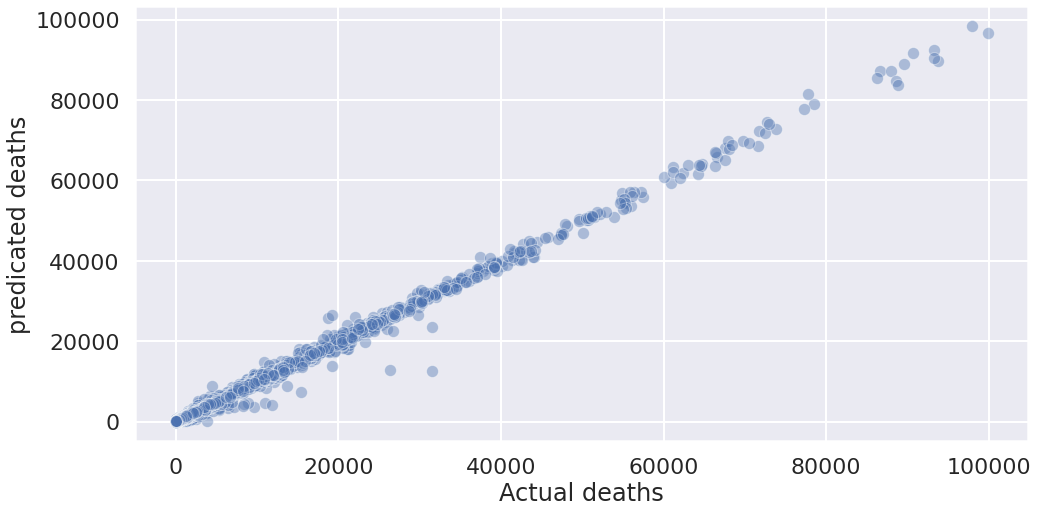

In [74]:
plt.figure(figsize=(16,8))
sns.scatterplot(y_valid,predict_valid,alpha=0.4)
plt.xlabel('Actual deaths')
plt.ylabel('predicated deaths')
plt.show()

# Droping id column from test data


In [75]:
cov_death_test.drop('Id',axis=1,inplace=True)

In [76]:
cov_death_test['Continent']=cov_death_test['Location'].apply(lambda x:country_to_continent(x) if(x not in notinlist) else x)

In [77]:
cov_death_test['Continent'].replace(error_list,new_list,inplace=True)

In [78]:
cov_death_test['Continent'].value_counts()

Africa           10900
Europe           10281
Asia              9852
North America     6027
South America     3073
Oceania           1607
World             1312
Name: Continent, dtype: int64

In [79]:
cov_death_test.drop('Location',axis=1,inplace=True)

In [80]:
cov_death_test['Year']=cov_death_test['Year'].map({2020:0,2021:1,2022:2})

In [81]:
cov_death_test=fill_miss_weekly(Weekly_feature,cov_death_test)

In [82]:
cov_death_test=fill_miss_min(missing_col,cov_death_test)

In [83]:
cov_death_test=fill_miss_per_hundred(missing_per_hundred,cov_death_test)

In [84]:
cov_death_test=handle_cat_feature(cov_death_test)

In [85]:
cov_death_test.drop('Continent_World',axis=1,inplace=True)

In [86]:
cov_death_test.shape

(43052, 23)

In [87]:
cov_death_test['Next Week\'s Deaths']=ran_model.predict(cov_death_test)

In [88]:
cov_death_test.sample(10)

,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Next Week's Deaths
32446,2448.00,1,137.55,165.00,9.27,25200571.00,13766680.00,11451335.00,420442.00,105227.00,141.59,77.35,64.34,2.36,5912.00,34056.00,0.19,0,0,0,0,0,1,176.40
17452,0.00,1,0.00,0.00,0.00,607270.00,502131.00,259968.00,1.00,13849.00,2.23,1.85,0.96,10.27,509.00,11123.00,0.04,1,0,0,0,0,0,12.38
3013,579.00,1,18.05,9.00,0.28,0.00,0.00,1.00,1.00,5974.00,81.07,46.85,38.69,10.27,186.00,4794.00,0.01,1,0,0,0,0,0,11.30
34213,0.00,1,0.00,0.00,0.00,95763.00,62417.00,33346.00,1.00,752.00,113.65,74.07,39.57,10.27,8924.00,61.00,0.07,0,0,1,0,0,0,0.01
41893,2873.00,1,417.23,266.00,38.63,1191397.00,733149.00,458248.00,1.00,22233.00,17.30,10.65,6.65,10.27,3229.00,8530.00,0.12,0,0,1,0,0,0,188.91
16194,21.00,1,19.00,1.00,0.91,0.00,0.00,1.00,1.00,643.00,81.07,46.85,38.69,10.27,582.00,86.00,0.01,1,0,0,0,0,0,1.06
4663,11009.00,1,1634.53,151.00,22.42,1031060.00,951010.00,1.00,1.00,17445.00,15.31,14.12,38.69,10.27,2590.00,14138.00,0.21,1,0,0,0,0,0,147.70
2255,107684.00,2,2267.66,508.00,10.70,0.00,0.00,1.00,1.00,11951.00,81.07,46.85,38.69,10.27,252.00,1071.00,0.00,0,0,1,0,0,0,422.53
22942,3163.00,1,779.04,150.00,36.95,0.00,0.00,1.00,1.00,2406.00,81.07,46.85,38.69,10.27,593.00,202.00,0.01,0,0,1,0,0,0,148.28
2937,68.00,2,223.66,0.00,0.00,0.00,0.00,1.00,1.00,12.00,81.07,46.85,38.69,10.27,39.00,12.00,0.00,0,0,0,0,1,0,0.09


# working on submission data

In [89]:
submission_csv=pd.read_csv('/kaggle/input/Covid19-Death-Predictions/sample_submission.csv')

In [90]:
submission_csv['Next Week\'s Deaths']=cov_death_test['Next Week\'s Deaths']

In [91]:
submission_csv.to_csv('/sample_submission.csv',index=False)

In [92]:
submission_csv

,Id,Next Week's Deaths
0,719557359,0.11
1,507527289,0.99
2,821551528,1.45
3,696602016,0.39
4,680387432,2.41
...,...,...
43047,713850901,3.29
43048,980183629,794.61
43049,386597907,392.68
43050,293365001,0.25


# please upvote me if you like my work.Thank you